[View in Colaboratory](https://colab.research.google.com/github/bell-one/tf_colab/blob/master/MNIST_withDNN_tf_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb)

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
keep_prob = tf.placeholder(tf.float32)
nb_classes = 10 # 0~9

X = tf.placeholder(tf.float32, [None, 28*28])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.get_variable("W1", shape=[784, 512],initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
m1 = tf.matmul(X,W1)+b1
layer1 = tf.nn.relu(m1)
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
m2 = tf.matmul(layer1,W2)+b2
layer2 = tf.nn.relu(m2)
layer2 = tf.nn.dropout(layer2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
m3 = tf.matmul(layer2,W3)+b3
layer3 = tf.nn.relu(m3)
layer3 = tf.nn.dropout(layer3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
m4 = tf.matmul(layer3,W4)+b4
layer4 = tf.nn.relu(m4+m2)
layer4 = tf.nn.dropout(layer4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 256],initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([256]))
m5 = tf.matmul(layer4,W5)+b5
layer5 = tf.nn.relu(m5)
layer5 = tf.nn.dropout(layer5, keep_prob=keep_prob)

W6 = tf.get_variable("W6", shape=[256, 256],initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([256]))
m6 = tf.matmul(layer5,W6)+b6
layer6 = tf.nn.relu(m6)
layer6 = tf.nn.dropout(layer6, keep_prob=keep_prob)

W7 = tf.get_variable("W7", shape=[256, 256],initializer=tf.contrib.layers.xavier_initializer())
b7 = tf.Variable(tf.random_normal([256]))
m7 = tf.matmul(layer6,W7)+b7
layer7 = tf.nn.relu(m7+m5)
layer7 = tf.nn.dropout(layer7, keep_prob=keep_prob)

W8 = tf.get_variable("W8", shape=[256, 128],initializer=tf.contrib.layers.xavier_initializer())
b8 = tf.Variable(tf.random_normal([128]))
m8 = tf.matmul(layer7,W8)+b8
layer8 = tf.nn.relu(m8)
layer8 = tf.nn.dropout(layer8, keep_prob=keep_prob)

W9 = tf.get_variable("W9", shape=[128, 128],initializer=tf.contrib.layers.xavier_initializer())
b9 = tf.Variable(tf.random_normal([128]))
m9 = tf.matmul(layer8,W9)+b9
layer9 = tf.nn.relu(m9)
layer9 = tf.nn.dropout(layer9, keep_prob=keep_prob)

W10 = tf.get_variable("W10", shape=[128, 128],initializer=tf.contrib.layers.xavier_initializer())
b10 = tf.Variable(tf.random_normal([128]))
m10 = tf.matmul(layer9, W10)
layer10 = tf.nn.relu(m10+m8)
layer10 = tf.nn.dropout(layer10, keep_prob=keep_prob)

W11 = tf.get_variable("W11", shape=[128, 10],initializer=tf.contrib.layers.xavier_initializer())
b11 = tf.Variable(tf.random_normal([nb_classes]))
hypo = tf.matmul(layer10,W11)+b11

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypo, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0005).minimize(cost)

In [0]:
# test model, accuracy
is_correct = tf.equal(tf.argmax(hypo, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Epoch: 0001 cost =  1.444721101
Accuracy:  0.8995
Label: [6]
Prediction: [6]


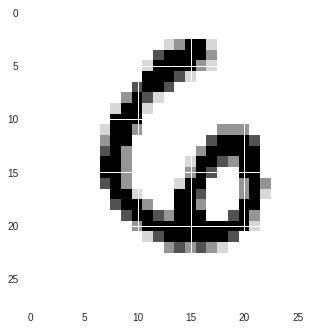

Epoch: 0002 cost =  0.412178313
Accuracy:  0.9344
Label: [8]
Prediction: [8]


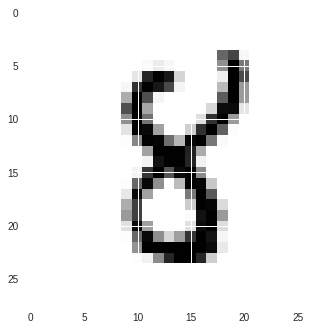

Epoch: 0003 cost =  0.277025931
Accuracy:  0.9549
Label: [9]
Prediction: [9]


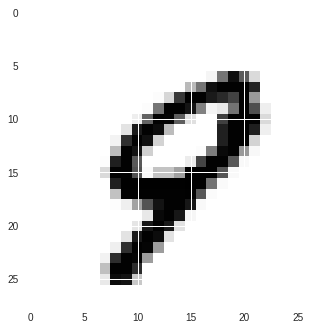

Epoch: 0004 cost =  0.209236577
Accuracy:  0.9584
Label: [7]
Prediction: [7]


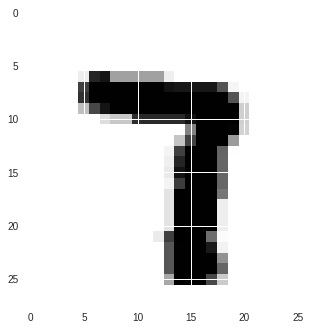

Epoch: 0005 cost =  0.177019148
Accuracy:  0.9664
Label: [8]
Prediction: [8]


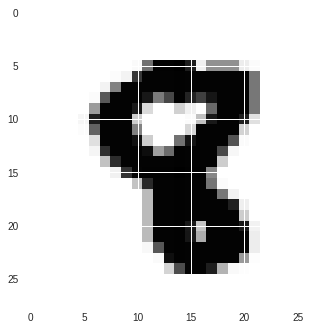

Epoch: 0006 cost =  0.153137693
Accuracy:  0.9669
Label: [6]
Prediction: [6]


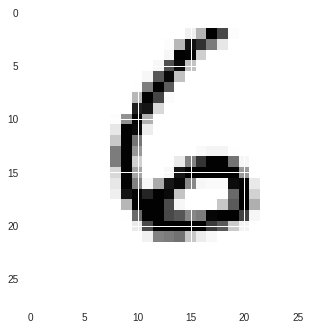

Epoch: 0007 cost =  0.132043728
Accuracy:  0.9709
Label: [3]
Prediction: [3]


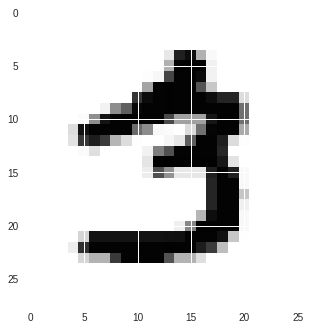

Epoch: 0008 cost =  0.116564941
Accuracy:  0.9725
Label: [8]
Prediction: [8]


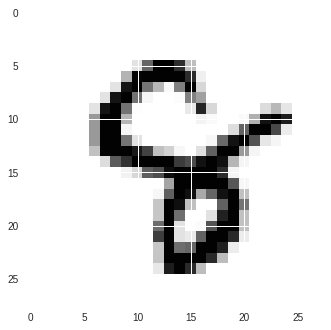

Epoch: 0009 cost =  0.103585588
Accuracy:  0.9748
Label: [7]
Prediction: [7]


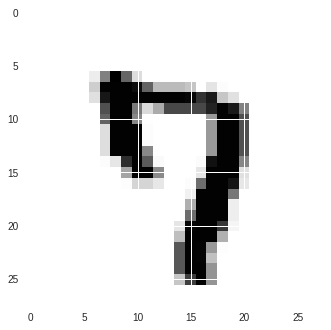

Epoch: 0010 cost =  0.094069936
Accuracy:  0.9768
Label: [2]
Prediction: [2]


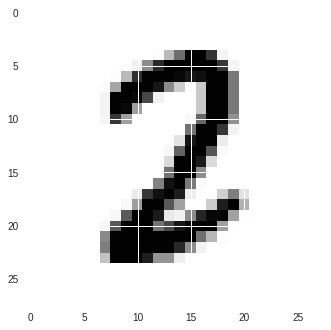

Epoch: 0011 cost =  0.088327473
Accuracy:  0.9772
Label: [2]
Prediction: [2]


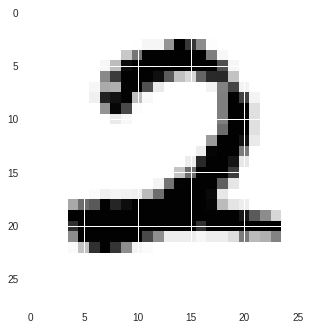

Epoch: 0012 cost =  0.077640498
Accuracy:  0.9766
Label: [3]
Prediction: [3]


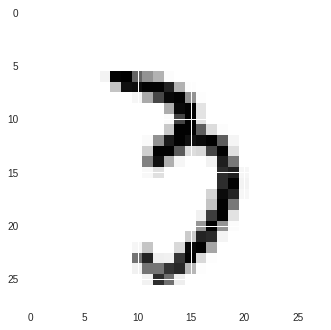

Epoch: 0013 cost =  0.074463452
Accuracy:  0.9788
Label: [9]
Prediction: [9]


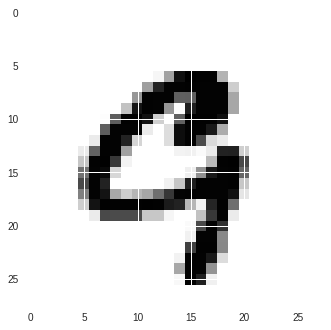

Epoch: 0014 cost =  0.067722720
Accuracy:  0.9799
Label: [1]
Prediction: [1]


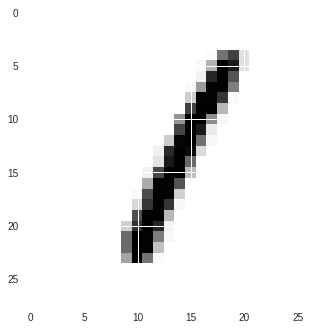

Epoch: 0015 cost =  0.060521760
Accuracy:  0.9796
Label: [7]
Prediction: [7]


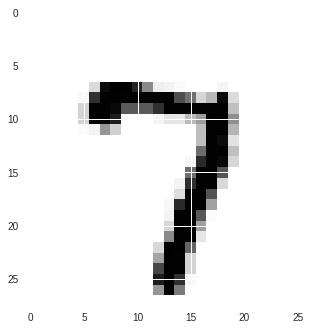

Epoch: 0016 cost =  0.059071179
Accuracy:  0.9816
Label: [2]
Prediction: [2]


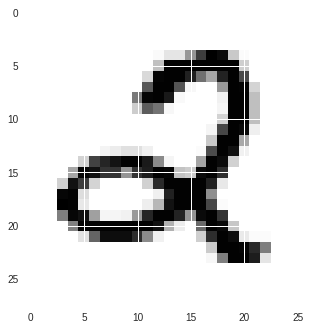

Epoch: 0017 cost =  0.054164365
Accuracy:  0.9828
Label: [8]
Prediction: [8]


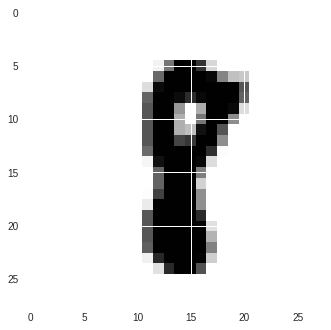

Epoch: 0018 cost =  0.053629470
Accuracy:  0.9816
Label: [6]
Prediction: [6]


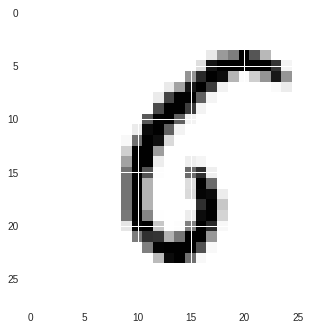

Epoch: 0019 cost =  0.046216811
Accuracy:  0.9818
Label: [8]
Prediction: [8]


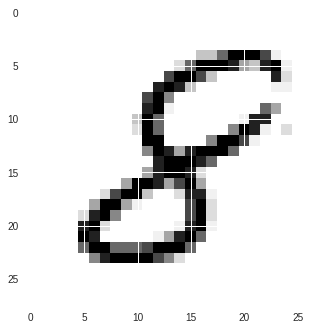

Epoch: 0020 cost =  0.043631838
Accuracy:  0.9824
Label: [1]
Prediction: [1]


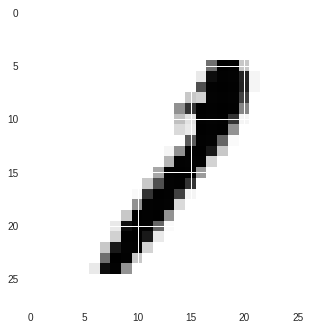

Epoch: 0021 cost =  0.040119945
Accuracy:  0.983
Label: [6]
Prediction: [6]


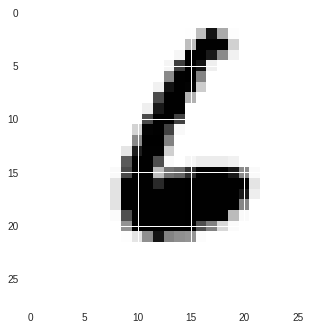

Epoch: 0022 cost =  0.041167770
Accuracy:  0.9814
Label: [2]
Prediction: [2]


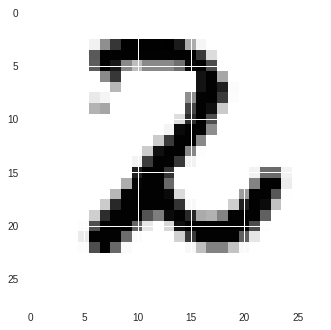

Epoch: 0023 cost =  0.038884929
Accuracy:  0.983
Label: [1]
Prediction: [1]


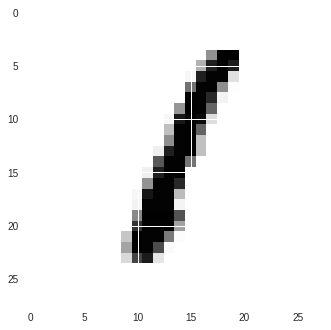

Epoch: 0024 cost =  0.036887549
Accuracy:  0.9824
Label: [5]
Prediction: [5]


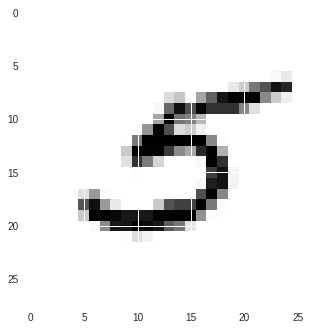

Epoch: 0025 cost =  0.036219540
Accuracy:  0.9838
Label: [6]
Prediction: [6]


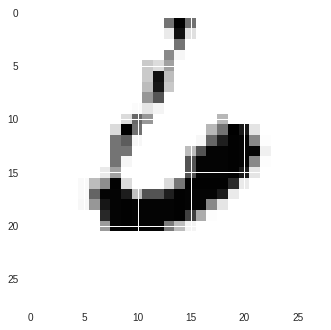

Epoch: 0026 cost =  0.035441438
Accuracy:  0.9817
Label: [9]
Prediction: [9]


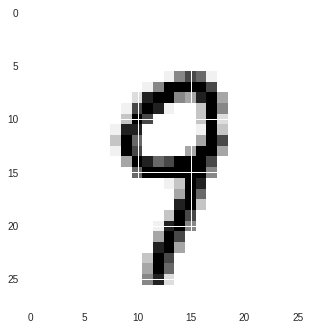

Epoch: 0027 cost =  0.030714035
Accuracy:  0.9818
Label: [5]
Prediction: [5]


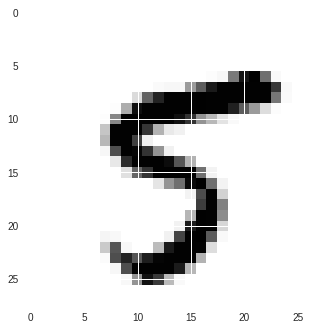

Epoch: 0028 cost =  0.030496156
Accuracy:  0.9831
Label: [9]
Prediction: [9]


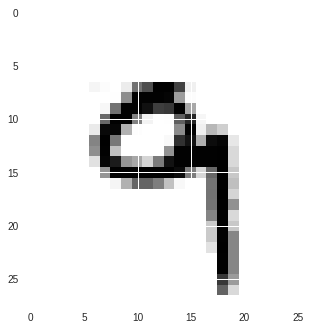

Epoch: 0029 cost =  0.028546925
Accuracy:  0.9832
Label: [5]
Prediction: [5]


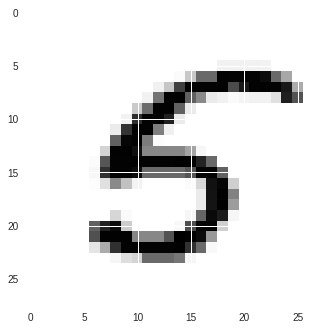

Epoch: 0030 cost =  0.026654030
Accuracy:  0.9842
Label: [1]
Prediction: [1]


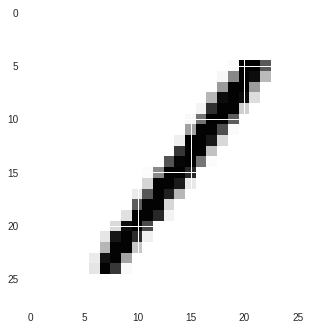

In [5]:
# graph params, launch graph
training_epochs = 30
batch_size = 300

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys, keep_prob : 0.7})
      avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    r = random.randint(0, mnist.test.num_examples-1)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y : mnist.test.labels,  keep_prob : 1}))
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("Prediction:", sess.run(tf.argmax(hypo, 1), feed_dict={X: mnist.test.images[r:r+1], keep_prob : 1}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()